### **Let's Begin:**

**Lets start by importing the required libraries.**

In [325]:
# Basic python libraries.
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Get rid of warnings!
import warnings
warnings.filterwarnings('ignore')

# Deep learning libraries.
import tensorflow as tf
from keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
from keras.layers import Dense,Dropout,GlobalAveragePooling2D,MaxPooling2D,Flatten,Conv2D,BatchNormalization,Activation
from keras.models import Model,Sequential
from tensorflow.keras.optimizers import Adam
from keras import regularizers
from tensorflow.keras.utils import plot_model
from keras.preprocessing import image

print('Above libraries have been imported.')

Above libraries have been imported.


**Seperate the Training and Validation Data.**

In [326]:
# Define the train and validataion data paths.
train_dir = '../input/fer2013/train'
val_dir = '../input/fer2013/test'

print('Data directories have been initialised.')

Data directories have been initialised.


**Have a look at our data.**

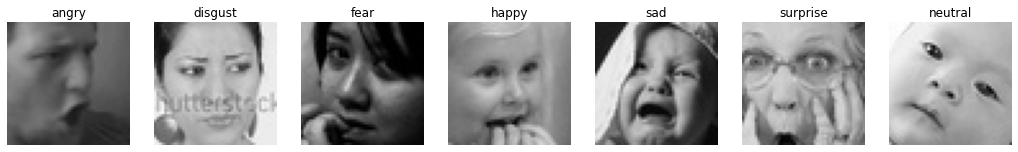

In [327]:
# Define the default image size.
img_size = 48

# Define the seven emotions provided in dataset.
emotion_list = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']

# Plot the images with each distinct emotions.
plt.figure(figsize=(18,22))
i = 1
for expression in emotion_list:
    img = load_img((train_dir + '/' + expression +'/'+ os.listdir(train_dir + '/' + expression)[59]))
    plt.subplot(1,7,i)
    plt.imshow(img)
    plt.title(expression)
    plt.axis('off')
    i += 1
plt.show()

**Perform some Data Augmentation on train and validations sets.**

In [328]:
batch_size = 64

datagen_train = ImageDataGenerator(rescale = 1./255,
#                                    validation_split = 0.2
                                  )

datagen_val = ImageDataGenerator(rescale = 1./255,
#                                  validation_split = 0.2
                                 )

print('Above data generator functions have been created.')

Above data generator functions have been created.


In [329]:
"""
Now apply the data augmentation to the images.
"""
# Training data.
train_set = datagen_train.flow_from_directory(directory=train_dir,
                                              target_size=(img_size,img_size),
                                              batch_size = batch_size,
                                              color_mode = 'grayscale',
                                              class_mode = "categorical",
                                              shuffle=True,
#                                               subset = "training"
                                              )

# Validation data.
val_set = datagen_train.flow_from_directory(directory=val_dir,
                                            target_size=(img_size,img_size),
                                            batch_size = batch_size,
                                            color_mode = 'grayscale',
                                            class_mode = "categorical",
                                            shuffle=False,
#                                             subset = "validation"
                                            )

print('Train and Validation sets have been created.')

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.
Train and Validation sets have been created.


**Now lets create our custom CNN model.**

In [330]:
# First layer
model= tf.keras.models.Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(48, 48,1)))
model.add(Conv2D(64,(3,3), padding='same', activation='relu' ))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Second layer
model.add(Conv2D(128,(5,5), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Third layer   
model.add(Conv2D(512,(3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Fourth layer
model.add(Conv2D(256,(3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# # Fifth layer
# model.add(Conv2D(512,(3,3), padding='same', activation='relu'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))

model.add(Flatten())

# First fully connected layer
model.add(Dense(256,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.30))

# Second fully connected layer  
model.add(Dense(512,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.30))

model.add(Dense(7, activation='softmax'))

model.compile(
    optimizer = Adam(lr=0.001), 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
  )

print('CNN model has been created you can proceed to train you data with this model.')

CNN model has been created you can proceed to train you data with this model.


**Model Summary.**

In [331]:
# Get model summary.
model.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_90 (Conv2D)           (None, 48, 48, 32)        320       
_________________________________________________________________
conv2d_91 (Conv2D)           (None, 48, 48, 64)        18496     
_________________________________________________________________
batch_normalization_109 (Bat (None, 48, 48, 64)        256       
_________________________________________________________________
max_pooling2d_71 (MaxPooling (None, 24, 24, 64)        0         
_________________________________________________________________
dropout_109 (Dropout)        (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_92 (Conv2D)           (None, 24, 24, 128)       204928    
_________________________________________________________________
batch_normalization_110 (Bat (None, 24, 24, 128)     

**Plot the CNN model.**

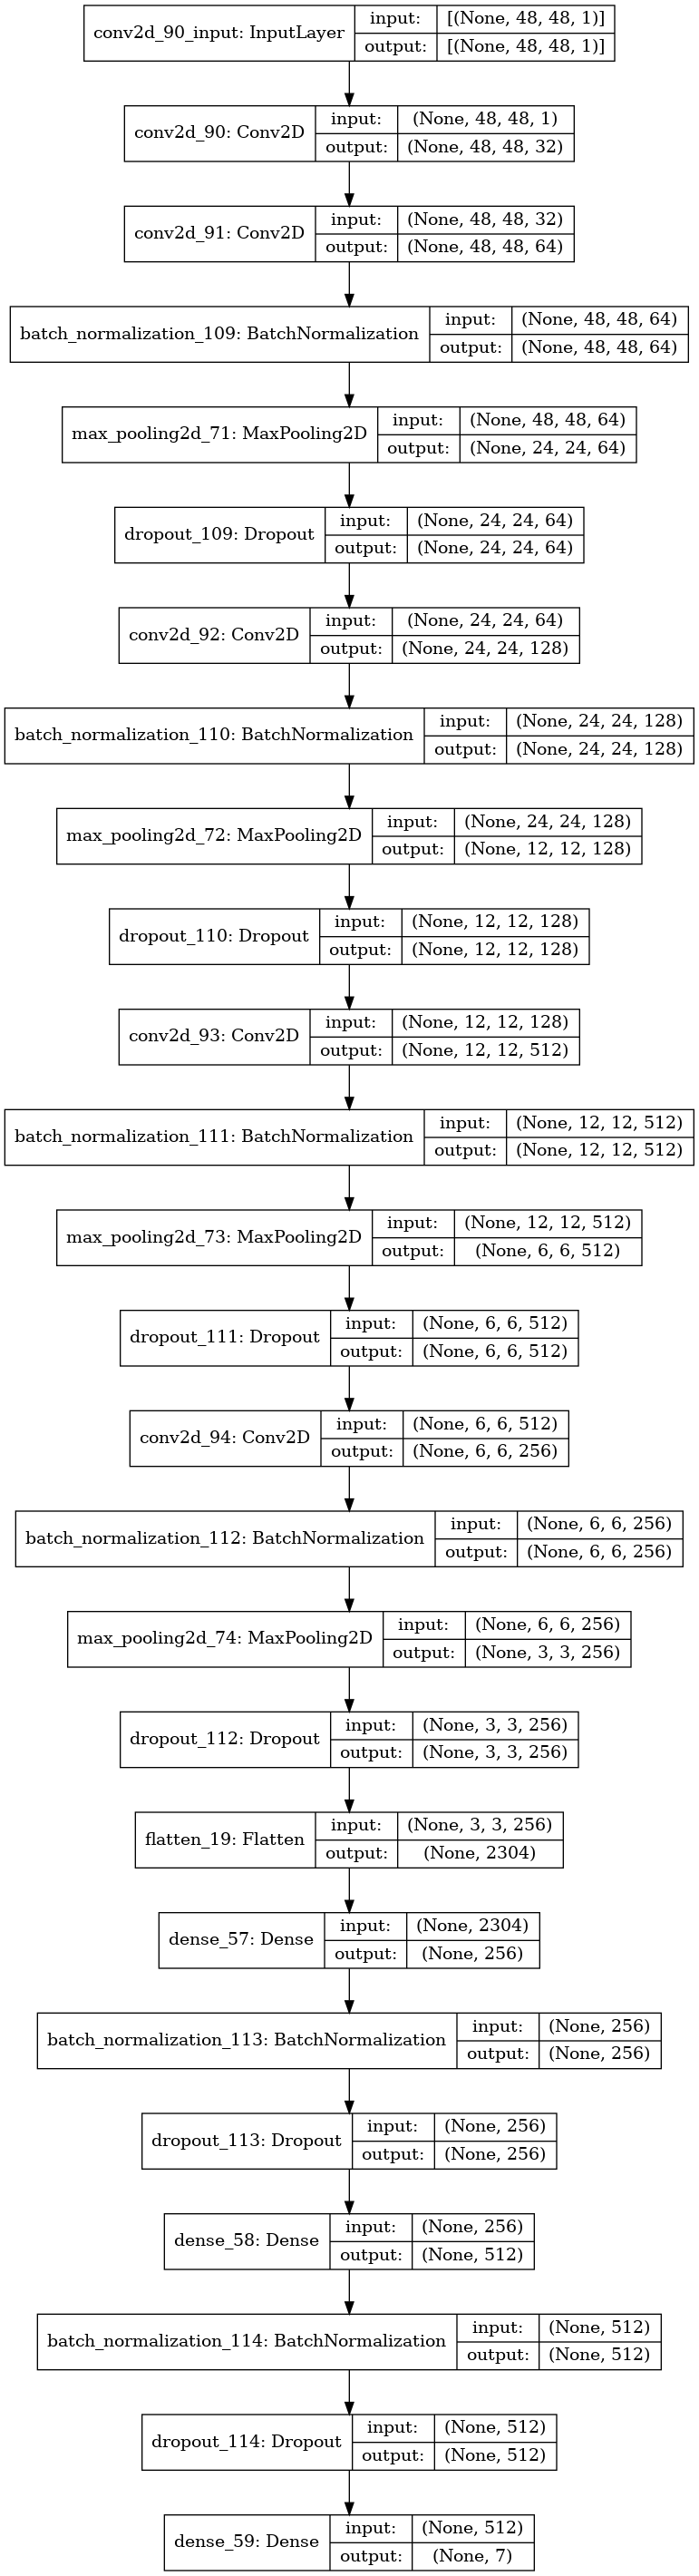

In [332]:
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

**Now lets Train the model!**

In [333]:
history = model.fit_generator(generator = train_set,
                              steps_per_epoch=train_set.n//train_set.batch_size,
                              validation_data = val_set,
                              validation_steps=val_set.n//val_set.batch_size,
                              # callbacks=callback_list,
                              epochs = 15)

print('Your model has been trained!!')

Epoch 1/15
448/448 [==============================] - 36s 77ms/step - loss: 2.0201 - accuracy: 0.2573 - val_loss: 1.8345 - val_accuracy: 0.3248
Epoch 2/15
448/448 [==============================] - 35s 78ms/step - loss: 1.5896 - accuracy: 0.3896 - val_loss: 1.7191 - val_accuracy: 0.3732
Epoch 3/15
448/448 [==============================] - 35s 77ms/step - loss: 1.3419 - accuracy: 0.4912 - val_loss: 1.2808 - val_accuracy: 0.5057
Epoch 4/15
448/448 [==============================] - 35s 77ms/step - loss: 1.2182 - accuracy: 0.5379 - val_loss: 1.2371 - val_accuracy: 0.5406
Epoch 5/15
448/448 [==============================] - 35s 77ms/step - loss: 1.1456 - accuracy: 0.5642 - val_loss: 1.1124 - val_accuracy: 0.5774
Epoch 6/15
448/448 [==============================] - 35s 78ms/step - loss: 1.0902 - accuracy: 0.5877 - val_loss: 1.1771 - val_accuracy: 0.5714
Epoch 7/15
448/448 [==============================] - 35s 77ms/step - loss: 1.0275 - accuracy: 0.6118 - val_loss: 1.1058 - val_accuracy:

**Plot the scores.**

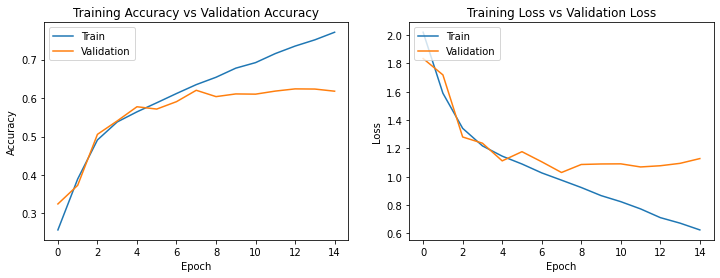

In [334]:
# Create plots for accuracy and loss.
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
fig.set_size_inches(12,4)

ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('Training Accuracy vs Validation Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'], loc='upper left')

ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Training Loss vs Validation Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'], loc='upper left')

plt.show()

**Test the model using an image.**

(48, 48)


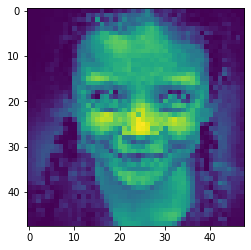

In [335]:
img = image.load_img("../input/testsub/test_sub.png",target_size = (48,48),color_mode = "grayscale")
img = np.array(img)
plt.imshow(img)
print(img.shape) 

In [336]:
img = np.expand_dims(img,axis = 0) #makes image shape (1,48,48)
img = img.reshape(1,48,48,1)
result = model.predict(img)
result = list(result[0])
print(result)

[0.0, 0.0, 0.0, 1.0, 1.3768181e-29, 0.0, 0.0]


In [337]:
emotion_dict = {0:'Angry',1:'Disgust',2:'Fear',3:'Happy',4:'Neutral',5:'Sad',6:'Surprise'}

In [338]:
img_index = result.index(max(result))
print(label_dict[img_index])
plt.show()

Happy


**Lets save the model and its weights for future uses.**

In [339]:
model.save('model_77.h5')

In [340]:
model.save_weights('model_weights_77.h5')